## DATASET DE DIABETES


Librerias a usar:

In [455]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Lectura del dataframe y manejo de datos sobresalientes:

In [456]:

DataFrame = pd.read_csv('diabetes.csv')


display(DataFrame.head())
display(DataFrame.describe())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Manejo de Outliers, usando el rango intercuartílico

In [457]:
q1 = DataFrame.quantile(0.25)
q3 = DataFrame.quantile(0.75)

iqr = q3-q1
outliers = ((DataFrame < (q1 - 1.5 * iqr)) | (DataFrame > (q3 + 1.5 * iqr)))

indices = outliers.any(axis=1)

DataFrame = DataFrame[~indices]
display(DataFrame)
display(DataFrame.describe())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


Cambio de 0's de los datos faltantes

In [458]:
#      Pregnancies   Glucose   BloodPressure  SkinThickness     insulin         BMI          DPF        Age 
#mean	3.804382	119.112676	72.120501	  20.563380	        65.931142	32.00579	0.429177	32.715180	0.312989


#llena los espacios vacios con la media de la columna
DataFrame.loc[DataFrame['Pregnancies'] == 0, 'Pregnancies'] = int(3.804382)
DataFrame.loc[DataFrame['Glucose'] == 0, 'Glucose'] = 119.11267
DataFrame.loc[DataFrame['BloodPressure'] == 0, 'BloodPressure'] = 72.120501
DataFrame.loc[DataFrame['SkinThickness'] == 0, 'SkinThickness'] = 20.563380
DataFrame.loc[DataFrame['Insulin'] == 0, 'Insulin'] = 65.931142	
DataFrame.loc[DataFrame['BMI'] == 0, 'BMI'] = 32.00579	
DataFrame.loc[DataFrame['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'] = 0.429177
DataFrame.loc[DataFrame['Age'] == 0, 'Age'] = int(32.715180)	

display(DataFrame.head())

C:\Users\Javier Rivera\AppData\Local\Temp\ipykernel_9512\1315739601.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '119.11267' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DataFrame.loc[DataFrame['Glucose'] == 0, 'Glucose'] = 119.11267
C:\Users\Javier Rivera\AppData\Local\Temp\ipykernel_9512\1315739601.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.120501' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DataFrame.loc[DataFrame['BloodPressure'] == 0, 'BloodPressure'] = 72.120501
C:\Users\Javier Rivera\AppData\Local\Temp\ipykernel_9512\1315739601.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.56338' has dtype incompatible with int64, please

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,65.931142,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,65.931142,26.6,0.351,31,0
2,8,183.0,64.0,20.56338,65.931142,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.56338,65.931142,25.6,0.201,30,0


Estadística General de los Datos a usar:


In [459]:
DataFrame.describe().map(lambda x: f"{x:0.2f}").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,639.00,4.22,2.93,1.00,2.00,3.00,6.00,13.00
Glucose,639.00,119.11,29.16,44.00,99.00,114.00,137.00,198.00
BloodPressure,639.00,72.12,11.35,38.00,64.00,72.00,80.00,106.00
SkinThickness,639.00,26.32,9.13,7.00,20.56,23.00,32.00,60.00
Insulin,639.00,97.61,56.87,15.00,65.93,65.93,120.00,318.00
BMI,639.00,32.01,6.43,18.20,27.30,32.00,35.95,50.00
DiabetesPedigreeFunction,639.00,0.43,0.25,0.08,0.24,0.36,0.59,1.19
Age,639.00,32.72,11.08,21.00,24.00,29.00,40.00,66.00
Outcome,639.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00


Gráfico de las columnas:

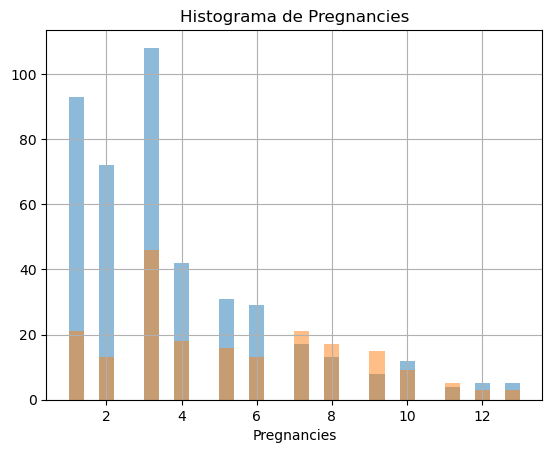

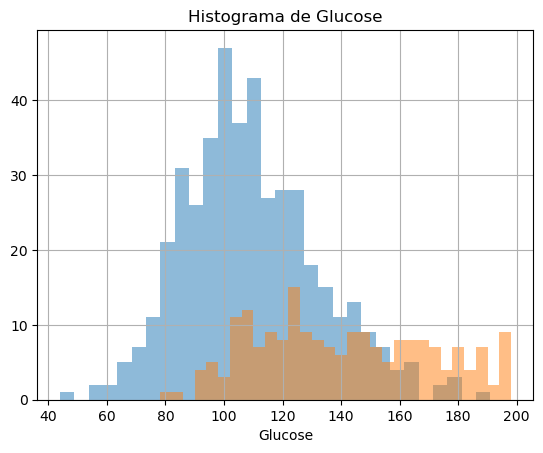

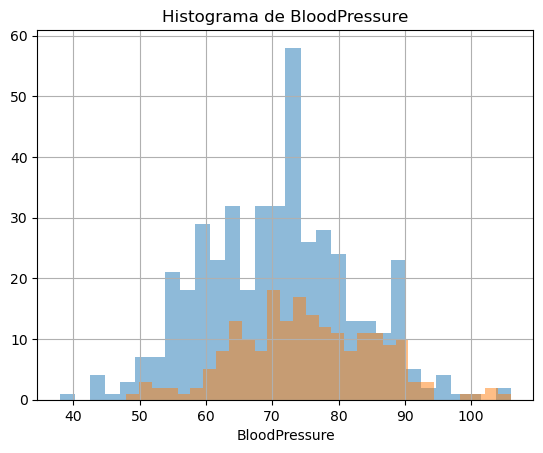

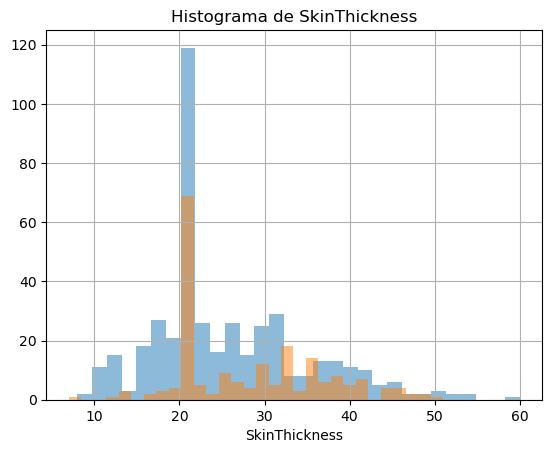

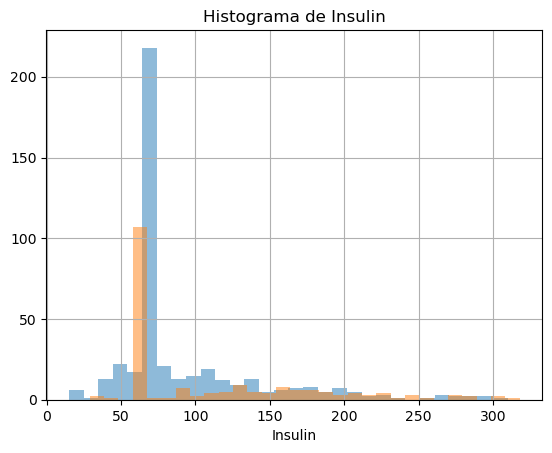

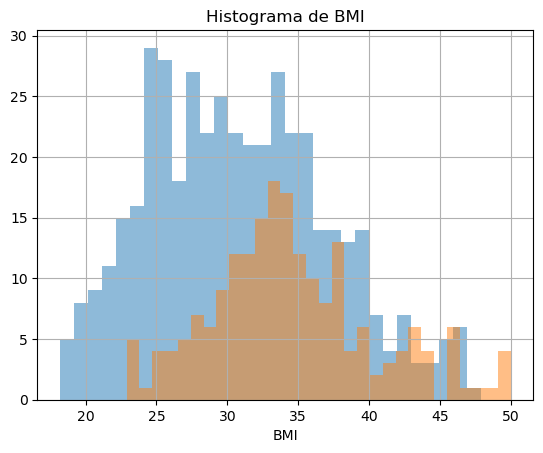

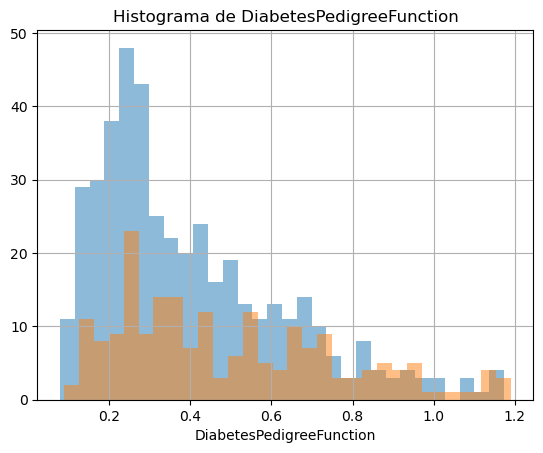

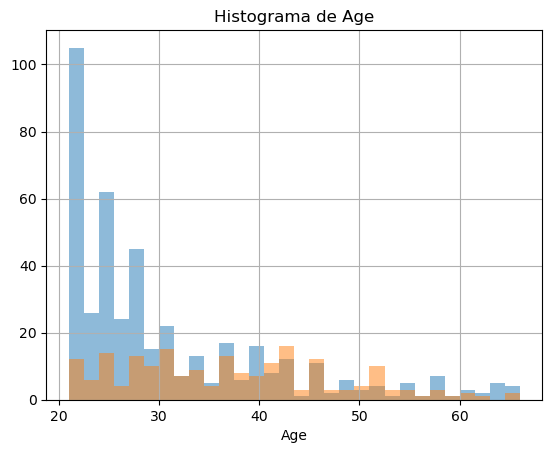

In [460]:
def plot_numerical_col(dataframe, numerical_col):
    groups = DataFrame.groupby('Outcome')
    plt.hist(groups[numerical_col].get_group(0), bins=30, alpha=0.5, label='0')
    plt.hist(groups[numerical_col].get_group(1), bins=30, alpha=0.5, label='0')
    plt.grid(True)
    plt.title('Histograma de '+ str(numerical_col))
    plt.xlabel("Personas")
    plt.xlabel(numerical_col)
    plt.show(block=True)

cols = [col for col in DataFrame.columns if "Outcome" not in col]


for col in cols:
    plot_numerical_col(DataFrame, col)

Cantidad de muestras con glucosa(1) y sin glucosa(0)

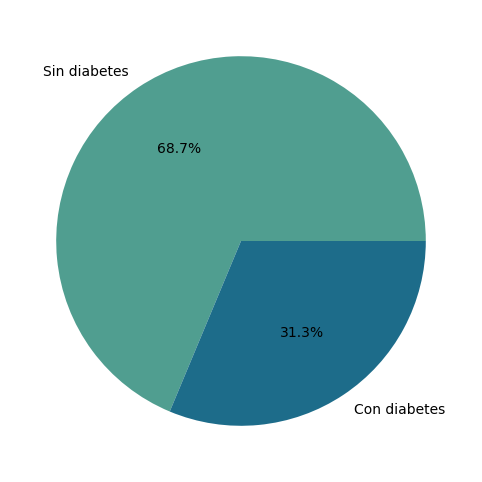

In [461]:
outcomes = DataFrame['Outcome'].value_counts()

palette = sns.color_palette("crest", len(outcomes))

label = [ "Sin diabetes", "Con diabetes"]
plt.figure(figsize=(8,6))
plt.pie(outcomes, labels= label, colors=palette, autopct='%1.1f%%')
plt.show()

Gráficos de Dispersión

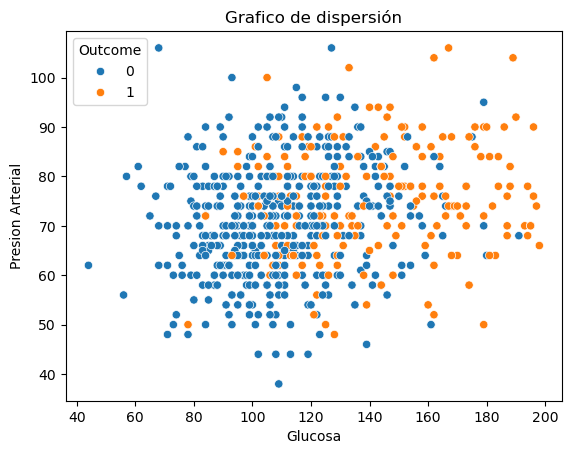

In [462]:
sns.scatterplot(data=DataFrame, x="Glucose", y="BloodPressure", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Glucosa")
plt.ylabel("Presion Arterial")
plt.show()

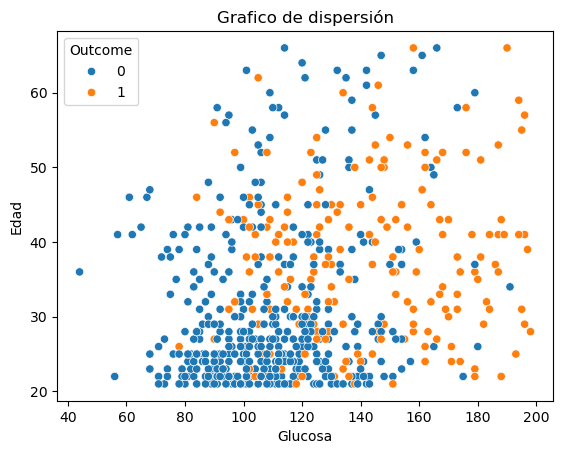

In [463]:
sns.scatterplot(data=DataFrame, x="Glucose", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

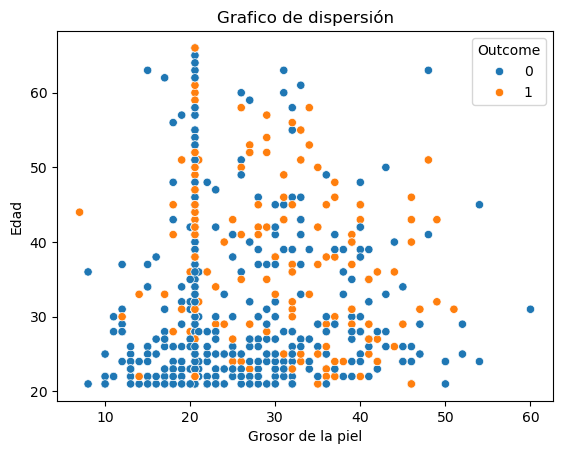

In [464]:
sns.scatterplot(data=DataFrame, x="SkinThickness", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

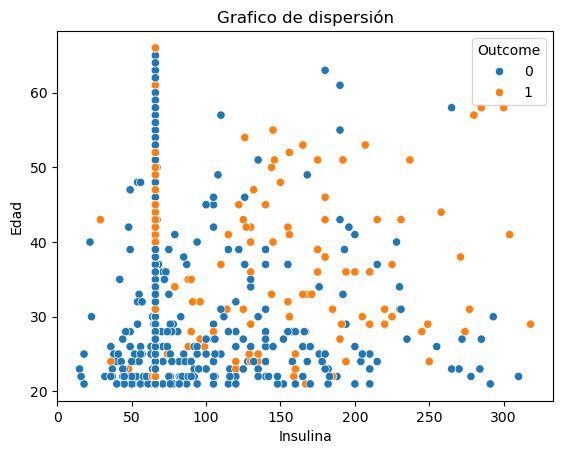

In [465]:
sns.scatterplot(data=DataFrame, x="Insulin", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

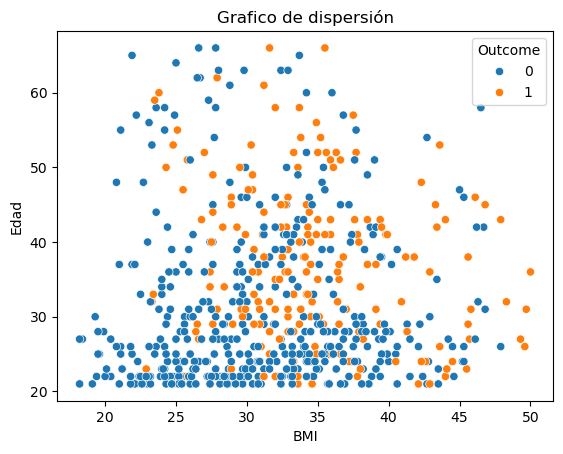

In [466]:
sns.scatterplot(data=DataFrame, x="BMI", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

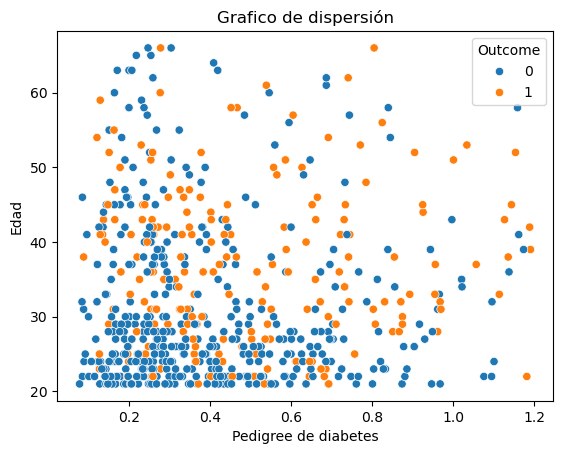

In [467]:
sns.scatterplot(data=DataFrame, x="DiabetesPedigreeFunction", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Pedigree de diabetes")
plt.ylabel("Edad")
plt.show()

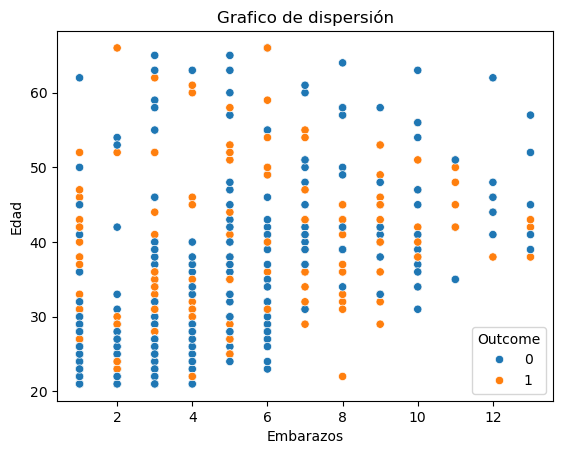

In [468]:
sns.scatterplot(data=DataFrame, x="Pregnancies", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

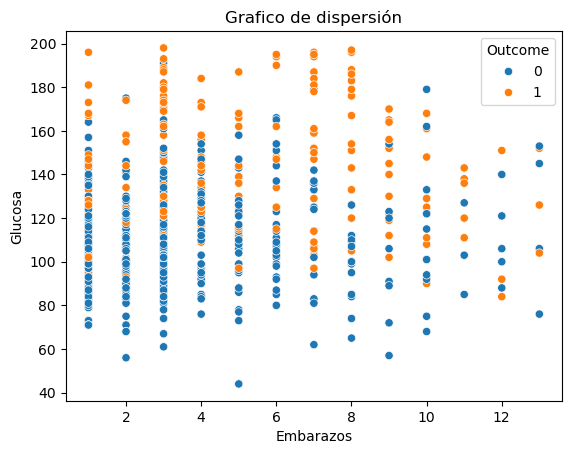

In [469]:
sns.scatterplot(data=DataFrame, x="Pregnancies", y="Glucose", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Embarazos")
plt.ylabel("Glucosa")
plt.show()

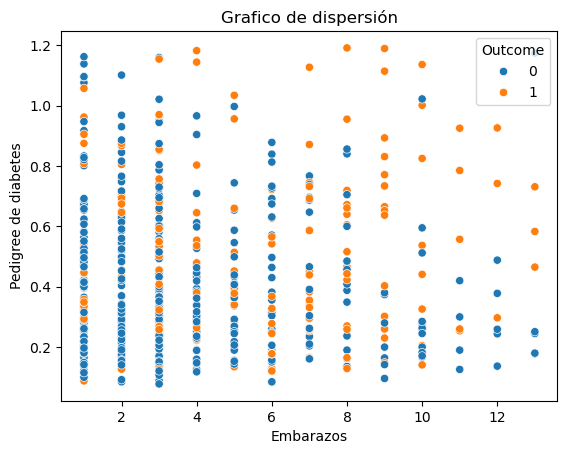

In [470]:
sns.scatterplot(data=DataFrame, x="Pregnancies", y="DiabetesPedigreeFunction", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Embarazos")
plt.ylabel("Pedigree de diabetes")
plt.show()

Division de los datos en Training, Testing y validación


In [471]:

DataFrame= DataFrame.sample(frac=1)  #baraja el dataframe
ratio=0.70 # 80% del dataset


total_rows = DataFrame.shape[0]
train_size = int(total_rows * ratio)


DataFrameTraining = DataFrame[0:train_size]

#dataframe a testear

#Guarda el 30% restante
DataFrameExtra = DataFrame[train_size:] 


ratio = 0.50

total_rows = DataFrameExtra.shape[0]
testing_size = int(total_rows * ratio)

DataFrameTesting = DataFrameExtra[0:testing_size]
DataFrameValidation = DataFrameExtra[testing_size:]

display(DataFrameTraining)
display(DataFrameTesting)
display(DataFrameValidation)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
483,3,84.0,82.0,31.00000,125.000000,38.2,0.233,23,0
62,5,44.0,62.0,20.56338,65.931142,25.0,0.587,36,0
288,4,96.0,56.0,17.00000,49.000000,20.8,0.340,26,0
180,6,87.0,80.0,20.56338,65.931142,23.2,0.084,32,0
642,6,147.0,80.0,20.56338,65.931142,29.5,0.178,50,1
...,...,...,...,...,...,...,...,...,...
239,3,104.0,76.0,20.56338,65.931142,18.4,0.582,27,0
232,1,79.0,80.0,25.00000,37.000000,25.4,0.583,22,0
582,12,121.0,78.0,17.00000,65.931142,26.5,0.259,62,0
96,2,92.0,62.0,28.00000,65.931142,31.6,0.130,24,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
249,1,111.0,86.0,19.00000,65.931142,30.1,0.143,23,0
650,1,91.0,54.0,25.00000,100.000000,25.2,0.234,23,0
566,1,99.0,72.0,30.00000,18.000000,38.6,0.412,21,0
448,3,104.0,64.0,37.00000,64.000000,33.6,0.510,22,1
647,3,179.0,50.0,36.00000,159.000000,37.8,0.455,22,1
...,...,...,...,...,...,...,...,...,...
636,5,104.0,74.0,20.56338,65.931142,28.8,0.153,48,0
94,2,142.0,82.0,18.00000,64.000000,24.7,0.761,21,0
479,4,132.0,86.0,31.00000,65.931142,28.0,0.419,63,0
314,7,109.0,80.0,31.00000,65.931142,35.9,1.127,43,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
166,3,148.0,66.0,25.00000,65.931142,32.5,0.256,22,0
344,8,95.0,72.0,20.56338,65.931142,36.8,0.485,57,0
462,8,74.0,70.0,40.00000,49.000000,35.3,0.705,39,0
17,7,107.0,74.0,20.56338,65.931142,29.6,0.254,31,1
386,5,116.0,74.0,29.00000,65.931142,32.3,0.660,35,1
...,...,...,...,...,...,...,...,...,...
596,3,67.0,76.0,20.56338,65.931142,45.3,0.194,46,0
544,1,88.0,78.0,29.00000,76.000000,32.0,0.365,29,0
233,4,122.0,68.0,20.56338,65.931142,35.0,0.394,29,0
400,4,95.0,64.0,20.56338,65.931142,32.0,0.161,31,1


Division en x_train, y_train, x_test, y_test

In [472]:
def divideData(dfTraining,dfTesting):
    x_train = dfTraining[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_train = dfTraining['Outcome']
    
    x_test = dfTesting[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_test = dfTesting['Outcome']
    
    return  x_train, y_train, x_test, y_test
    
x_train, y_train, x_test, y_test = divideData(DataFrameTraining,DataFrameTesting) 


## KNN del Dataset Diabetes

In [476]:

results = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predic = knn.predict(x_test)
    accuracy = accuracy_score(y_test, predic)
    precision = precision_score(y_test, predic)
    recall = recall_score(y_test, predic)
    f1 = f1_score(y_test, predic)
    matriz = confusion_matrix(y_test, predic)
    results.append({"k": i, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "matriz":matriz })
    

maxAccuracy = max(results, key = lambda x: x['accuracy'])
maxPrecision = max(results, key = lambda x: x['precision'])
maxRecall = max(results, key = lambda x: x['recall'])
maxF1 = max(results, key = lambda x: x['f1'])

print("Max Accuracy")
print(f"k = {maxAccuracy['k']} || Accuracy = {maxAccuracy['accuracy']} || Precision = {maxAccuracy['precision']} || Recall = {maxAccuracy['recall']} || F1 = {maxAccuracy['f1']}")

print("Max Precision")
print(f"k = {maxPrecision['k']} || Accuracy = {maxPrecision['accuracy']} || Precision = {maxPrecision['precision']} || Recall = {maxPrecision['recall']} || F1 = {maxPrecision['f1']}")

print("Max Recall")
print(f"k = {maxRecall['k']} || Accuracy = {maxRecall['accuracy']} || Precision = {maxRecall['precision']} || Recall = {maxRecall['recall']} || F1 = {maxRecall['f1']}")

print("Max F1")
print(f"k = {maxF1['k']} || Accuracy = {maxF1['accuracy']} || Precision = {maxF1['precision']} || Recall = {maxF1['recall']} || F1 = {maxF1['f1']}")



Max Accuracy
k = 32 || Accuracy = 0.7916666666666666 || Precision = 0.7647058823529411 || Recall = 0.4482758620689655 || F1 = 0.5652173913043478
Max Precision
k = 32 || Accuracy = 0.7916666666666666 || Precision = 0.7647058823529411 || Recall = 0.4482758620689655 || F1 = 0.5652173913043478
Max Recall
k = 9 || Accuracy = 0.78125 || Precision = 0.6666666666666666 || Recall = 0.5517241379310345 || F1 = 0.6037735849056604
Max F1
k = 9 || Accuracy = 0.78125 || Precision = 0.6666666666666666 || Recall = 0.5517241379310345 || F1 = 0.6037735849056604


Matriz de Confusión

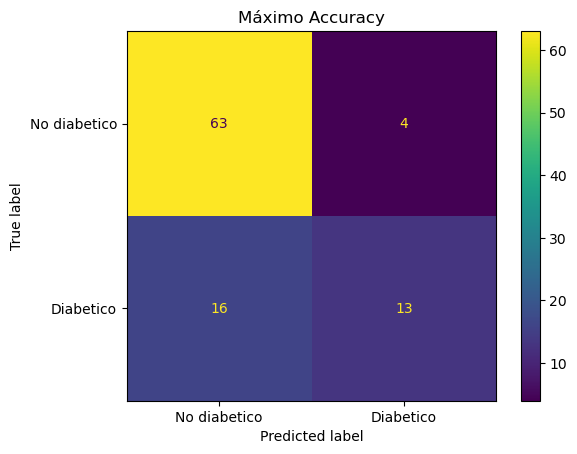

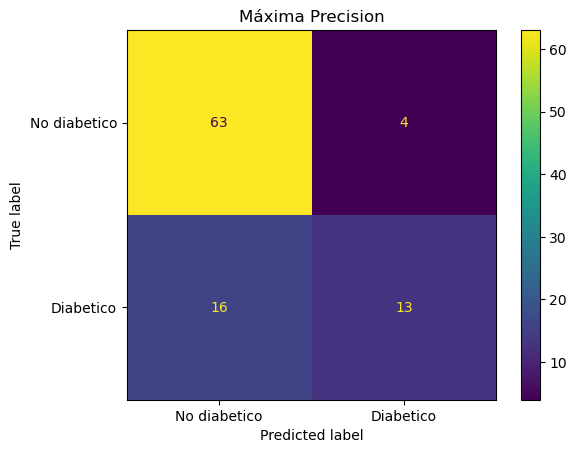

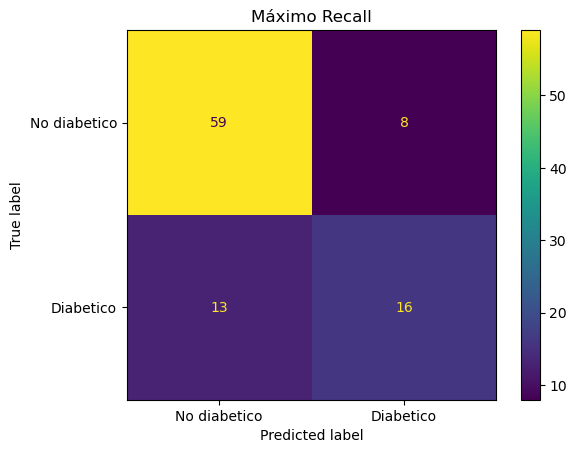

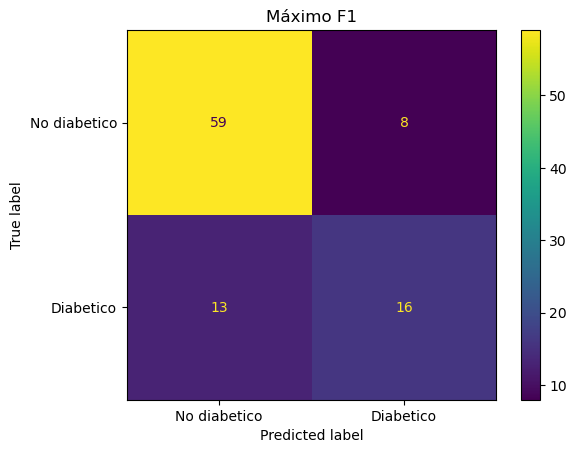

In [478]:
def matrizConfusion(matriz,title):
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
    disp.plot()
    plt.xticks([0,1], ['No diabetico', 'Diabetico'])
    plt.yticks([0,1], ['No diabetico', 'Diabetico'])
    plt.title(title)    
    plt.show()


matrizConfusion(maxAccuracy["matriz"], "Máximo Accuracy")
matrizConfusion(maxPrecision["matriz"], "Máxima Precision")
matrizConfusion(maxRecall["matriz"], "Máximo Recall")
matrizConfusion(maxF1["matriz"], "Máximo F1")

